## K-means Clustering

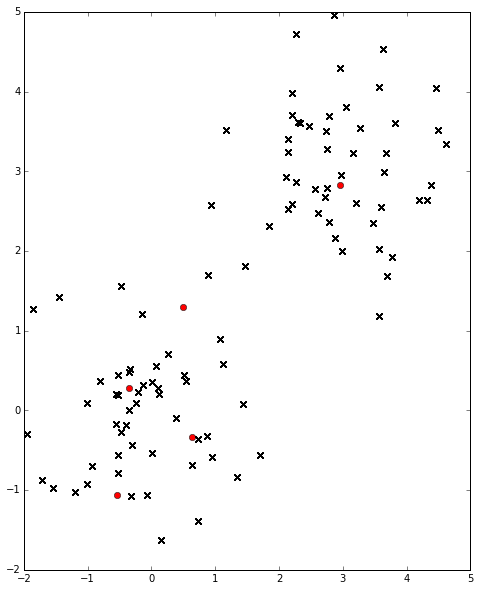

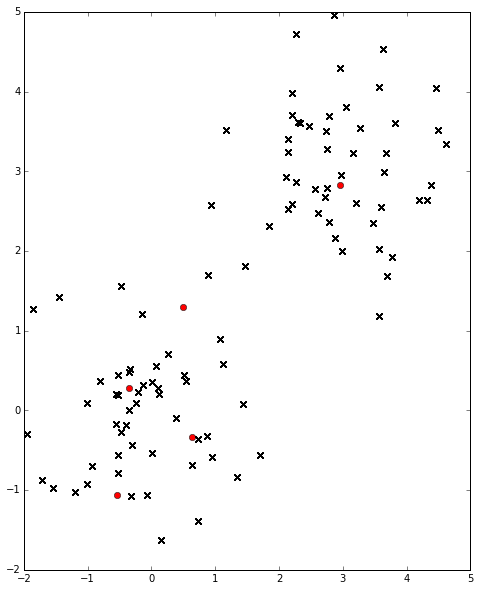

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pylab as plt

import time
from IPython import display

N = 100
D = 2
X1 = np.random.randn(D,N/2)
X2 = 0.8*np.random.randn(D,N/2) + 3*np.ones((D, N/2))

X = np.hstack((np.mat(X1), np.mat(X2)))

#plt.plot(X[0,:], X[1,:],'x')
#plt.show()

K = 5;

W = np.mat('[3,0;0,1]')
mu = X[:,0:K]
#plt.plot(mu[0,:],mu[1,:],'ro')

EP = 200

fig = plt.figure(figsize=(8,10))
plt.plot(X[0,:], X[1,:],'kx')

ax = fig.gca()
ln = plt.Line2D(xdata=mu[0,:], ydata=mu[1,:], marker='o', color='r',linestyle=None,linewidth=0)
ax.add_line(ln)

eta = 0.3

for e in range(EP):
    
    dist = np.zeros((N,K))
    for i in range(N):
        for c in range(K):
            err = X[:,i]-mu[:,c]
            dist[i,c] = float(err.T*W.I*err)
    
    # Assignments
    a = np.argmin(dist, axis=1)
    
    mu = np.mat(np.zeros((D,K)))
    count = np.zeros((K))
    for i,c in enumerate(a):
        count[c] += 1
        #mu[:,c] = (count[c]-1)/count[c]*mu[:,c] + 1/count[c]*X[:,i]
        mu[:,c] = (1-eta)*mu[:,c] + eta*X[:,i]
    
    ln.set_xdata(mu[0,:])
    ln.set_ydata(mu[1,:])
    
    #plt.subplot(EP,1,e+1)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.1)
    plt.plot(X[0,:], X[1,:],'kx')
    #plt.plot(mu[0,:],mu[1,:],'ro')

plt.show()
    

## SVD

[[-0.27178384 -0.68695254 -0.06148734  0.4272493   0.00402096 -0.1513811
   0.02996431 -0.6319934   0.73270656  1.41604634  0.31682215 -1.48061139
  -0.08188947 -0.25580301  0.82346341 -0.22943276  0.20392575  0.63260018
  -0.15095987  1.19067592  0.69470086 -0.50328369 -0.01189888 -1.12050844
   0.1129367  -0.06433369  0.32727297 -0.6736358   0.13550325 -2.06335767]
 [ 0.68643155 -0.49211519  0.5827548   0.09672223  1.07188718  0.87165245
  -1.34017859  1.99774755 -0.27870617 -0.95964831  0.01076813 -1.79994624
  -0.72738759 -0.95079763  1.01435088 -0.26568168 -1.79892967  1.15927628
  -0.82135806 -0.31342689  0.12822283 -0.53477584  2.18065339  0.87438316
  -0.95920637  1.50502881 -0.53102307 -0.68731283  2.46692924  0.20997204]
 [ 1.75157822  0.65803829  0.06591008  1.08197471 -0.88957676 -1.21935735
  -0.96341036  1.96135081  1.23434055  0.24783934  1.02953266 -0.15107712
  -1.28969139 -0.98262655  1.09311658  0.09747725  1.49034424  0.08722825
  -0.56725631 -2.49377916  0.56450124

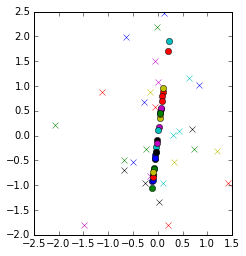

In [2]:
D = 4
N = 30

#X = np.mat('[1,2,3;5,7,2]')
X = np.mat(np.random.randn(D,N))


U,Sig,V = np.linalg.svd(X, full_matrices=True)

print(X)
print(U)
print(np.diag(Sig))
print(V)

a = U[:,0] 
w = Sig[0]*V[0,:]


Xhat = a*w


plt.plot(X[0,:], X[1,:],'x')
plt.plot(Xhat[0,:], Xhat[1,:],'o')
ax = plt.gca()
ax.set_aspect(1)
plt.show()


In [4]:


df_iris = pd.read_csv(u'../data/iris.txt',sep=' ')

df_iris

,sl,sw,pl,pw,c
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


[[ 5.1  4.9  4.7  4.6  5. ]
 [ 3.5  3.   3.2  3.1  3.6]
 [ 1.4  1.4  1.3  1.5  1.4]
 [ 0.2  0.2  0.2  0.2  0.2]]


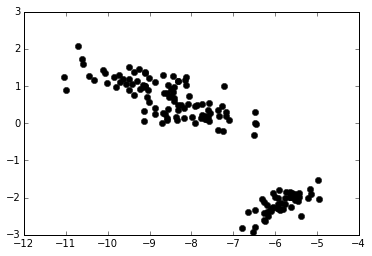

In [28]:
X = np.vstack((np.mat(df_iris.sl),np.mat(df_iris.sw), np.mat(df_iris.pl), np.mat(df_iris.pw) ))

#plt.plot(X[0,:], X[2,:],'kx')
#plt.show()

U,S,VT = np.linalg.svd(X)

K = 2

X_approx = U[:,0:2]*np.diag(S[0:2])*VT[0:2,:]

print(X[:,0:5])

X_approx[:,0:5]


Z = np.diag(S[0:2])*VT[0:2,:]
plt.plot(Z[0,:], Z[1,:],'ko')
plt.show()


## ALS : Alternating Least Squares



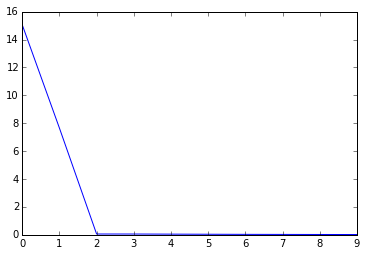

In [48]:

## Y = A*B

M = 10
N = 20
K = 2

A_true = np.mat(np.random.randn(M, K))
B_true = np.mat(np.random.randn(K, N))

Y = A_true*B_true + 0.01*np.random.randn(M, N)



#plt.imshow(Y, interpolation='nearest')



U,S,VT = np.linalg.svd(Y)

plt.plot(S)



In [49]:

B = np.linalg.pinv(A_true)*Y

print(B)

print(B_true)



[[-0.24689075  1.57755101 -0.40278582 -0.97668021  0.83105358 -0.39167884
   0.42919512  0.32386468 -0.21709037 -1.03028013  0.82323109 -0.21183812
   0.34578657 -2.27599858  1.70841411  1.0604837  -0.48612418 -0.10871185
   0.92060881 -0.02923552]
 [-1.02162883 -0.31562673 -0.26050259 -2.68765201 -0.07986925  1.67245433
  -0.65703119  1.49145806 -0.64543568  0.41723178 -2.12081694  0.45172714
   0.92322494  1.05729907 -0.95724887  0.85934019  1.07326711 -1.44889833
   0.28261623  1.84063881]]
[[-0.25720486  1.57520013 -0.40790521 -0.97979845  0.82904462 -0.38912155
   0.41717713  0.33143982 -0.21769882 -1.03915673  0.82424218 -0.20780859
   0.34309775 -2.26655924  1.71285713  1.06395845 -0.48792366 -0.11096627
   0.9202921  -0.02872279]
 [-1.02509732 -0.31157644 -0.26126411 -2.6852999  -0.09048101  1.67434223
  -0.6628631   1.49236572 -0.64664919  0.41193001 -2.12017968  0.44967789
   0.92065636  1.05725399 -0.94471663  0.86113879  1.06992555 -1.44693705
   0.28314188  1.83337281]]


In [58]:

A = np.mat(np.random.randn(M, K))
B = np.mat(np.random.randn(K, N))


for e in range(5):

    Y_est = A*B
    E = Y - Y_est
    err = np.sum(np.sum(np.array(E)*np.array(E)))
    print(err)

    B = np.linalg.pinv(A)*Y

    Y_est = A*B
    E = Y - Y_est
    err = np.sum(np.sum(np.array(E)*np.array(E)))
    print(err)

    A = (np.linalg.pinv(B.T)*Y.T).T

    Y_est = A*B
    E = Y - Y_est
    err = np.sum(np.sum(np.array(E)*np.array(E)))
    print(err)





616.260844618
206.41135676
0.022270864975
0.022270864975
0.012636800579
0.0126366287166
0.0126366287166
0.0126366287107
0.0126366287107
0.0126366287107
0.0126366287107
0.0126366287107
0.0126366287107
0.0126366287107
0.0126366287107


In [59]:
A

matrix([[-3.84717275, -1.1647452 ],
        [ 0.59184538, -0.3115495 ],
        [-3.74445309,  3.04945327],
        [-8.20662843,  3.38580033],
        [-1.96267491, -0.82938965],
        [-1.59871863,  0.9701449 ],
        [-0.80395512, -1.67948961],
        [-2.77493982,  1.32603348],
        [ 1.34590873,  0.30487757],
        [-0.28603236,  0.10144157]])

In [60]:
A_true

matrix([[ 1.43190551, -1.19740565],
        [ 0.04161512,  0.12247163],
        [-0.83908214, -0.64963932],
        [-0.07577827, -1.82300917],
        [ 0.85587752, -0.63988428],
        [-0.18214254, -0.3192553 ],
        [ 1.06418939, -0.42793252],
        [-0.12095646, -0.59426192],
        [-0.44321394,  0.4036003 ],
        [ 0.00950295, -0.06394318]])

In [61]:
U,S,VT = np.linalg.svd(Y)

A.T*U[:,2:]


matrix([[ -1.63365721e-15,   6.36577266e-16,   2.19513670e-16,
          -2.04362614e-16,   6.70384178e-16,  -5.96420160e-16,
           1.41153760e-15,  -2.96043897e-16],
        [ -3.10030222e-16,   1.38068360e-16,  -5.57825729e-17,
           2.72405407e-16,  -8.13897637e-16,  -1.08668305e-16,
          -7.28972350e-17,   5.72466795e-16]])

## Stochastic Gradient Descent (SGD)

Rank of approximation is $1$

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pylab as plt

Nr = 2
Nc = 3

M = np.mat('[0, 1, 1;1, 1, 0]')
Y = np.mat('[0, 2, 4;3, 5, 0]')


Ys = np.mat('[2,0,1;4,0,2;3,1,0;5, 1,1]')

Ysize = Ys.shape[0]

A = np.mat(np.random.rand(Nr, 1))
B = np.mat(np.random.rand(1, Nc))

E = np.array(M)*np.array(Y - A*B)
np.sum(E*E)/np.sum(np.array(M))

EPOCH = 100
Eta = 0.1
eta = Eta

for i in range(EPOCH):
    E = np.array(M)*np.array(Y - A*B)
    Err = np.sum(E*E)/np.sum(np.array(M))
    print(Err)
    
    for k in range(Ysize):
        u = Ys[k,1]
        m = Ys[k,2]
        
        err = Ys[k,0] - A[u,0]*B[0,m]
        
        temp_A = A[u,0] + eta*err*B[0,m]
        B[0,m]   = B[0,m] + eta*err*A[u,0]
        A[u,0]   = temp_A
    
    eta = Eta*1./(i+1)



11.0769926265
7.80241114215
3.72357836563
2.4509723585
1.93478423846
1.65921234432
1.48448980809
1.36134211049
1.26840506668
1.19491850061
1.13483533098
1.08446670746
1.04141634864
1.00404899851
0.971203861101
0.942030035965
0.915886963914
0.892281523467
0.870826796322
0.851214174311
0.833193972481
0.816561632379
0.801147698012
0.786810398221
0.773430067496
0.760904887881
0.749147596114
0.738082906728
0.727645473492
0.717778260712
0.708431230131
0.69956027342
0.691126337598
0.683094703402
0.675434385877
0.66811763342
0.66111950667
0.654417522613
0.647991352265
0.641822562651
0.635894395587
0.630191577225
0.624700153412
0.619407346838
0.614301432627
0.609371629634
0.604608005149
0.600001391098
0.595543310135
0.591225910276
0.587041906933
0.582984531371
0.579047484777
0.575224897218
0.571511290897
0.567901547176
0.564390876925
0.560974793803
0.55764909014
0.554409815117
0.551253255005
0.548175915217
0.545174503999
0.542245917574
0.539387226595
0.536595663769
0.533868612536
0.531203596699

Rank of approximation is $K$

In [68]:
Nr = 2
Nc = 3
Nk = 2

M = np.mat('[0, 1, 1;1, 1, 0]')
Y = np.mat('[0, 2, 4;3, 5, 0]')
Ys = np.mat('[2,0,1;4,0,2;3,1,0;5, 1,1]')
Ysize = Ys.shape[0]

A = np.mat(np.random.rand(Nr, Nk))
B = np.mat(np.random.rand(Nk, Nc))

EPOCH = 1000
Eta = 0.1
eta = Eta

for i in range(EPOCH):
    if i%10==0:
        E = np.array(M)*np.array(Y - A*B)
        Err = np.sum(E*E)/np.sum(np.array(M))
        print(Err)
    
    for k in range(Ysize):
        u = Ys[k,1]
        m = Ys[k,2]
        
        err = Ys[k,0] - A[u,:]*B[:,m]
        
        temp_A = A[u,:] + eta*err[0,0]*B[:,m].T
        B[:,m]   = B[:,m] + eta*err[0,0]*A[u,:].T
        A[u,:]   = temp_A
    
    eta = Eta*1./(i+1)



11.3422372325
0.736754732138
0.555474395541
0.47752380818
0.430071947237
0.39688637519
0.371819075973
0.351924561689
0.335580985619
0.321807842737
0.309970930646
0.299638453819
0.290504324256
0.282344375977
0.27498996242
0.268311306351
0.262206600093
0.256594640472
0.251409714864
0.246597965381
0.242114749776
0.237922690372
0.233990207896
0.230290403431
0.226800194494
0.22349963944
0.220371403337
0.217400331453
0.214573105548
0.211877964533
0.209304475677
0.206843345842
0.2044862647
0.202225773693
0.200055155856
0.197968342688
0.195959835008
0.194024635387
0.192158190184
0.190356339614
0.188615274562
0.186931499079
0.185301797697
0.183723206853
0.182192989805
0.18070861456
0.179267734389
0.177868170576
0.176507897098
0.175185026995
0.173897800208
0.172644572695
0.171423806681
0.170234061893
0.169073987671
0.167942315846
0.166837854311
0.165759481189
0.164706139546
0.163676832585
0.162670619275
0.161686610355
0.160723964692
0.159781885951
0.158859619537
0.157956449794
0.157071697437
0.1

In [72]:
print(Y)
print(M)
print(Ys)



[[0 2 4]
 [3 5 0]]
[[0 1 1]
 [1 1 0]]
[[2 0 1]
 [4 0 2]
 [3 1 0]
 [5 1 1]]


In [67]:
import scipy.sparse as sp

A = sp.rand(100, 100, 0.01).tocsr()

i,j,v = sp.find(A)

for e in zip(i,j):
    print(e, A[e[0], e[1]])

(1, 98) 0.482478627511
(2, 77) 0.780503468703
(3, 10) 0.129636903524
(3, 56) 0.0238030773016
(4, 86) 0.547844111056
(6, 61) 0.379767533489
(7, 70) 0.442947789129
(8, 58) 0.893137788745
(8, 69) 0.885420817687
(9, 0) 0.0436475536379
(9, 9) 0.167701688863
(10, 52) 0.0388379303701
(11, 67) 0.363836152597
(13, 5) 0.873801303159
(13, 14) 0.873283984149
(13, 65) 0.947130647143
(13, 89) 0.266336679173
(15, 49) 0.276220442002
(16, 2) 0.692775817969
(18, 94) 0.727966684564
(21, 41) 0.465043554285
(22, 82) 0.500404058784
(23, 26) 0.385445046497
(25, 10) 0.255050656851
(28, 68) 0.28975034871
(31, 11) 0.500241501491
(31, 73) 0.381562135314
(31, 96) 0.537722394598
(33, 6) 0.783271703857
(33, 34) 0.564569188796
(34, 26) 0.782941268309
(34, 82) 0.0764826403935
(35, 5) 0.73335356236
(35, 80) 0.516201873738
(38, 44) 0.556231019933
(38, 66) 0.962131341498
(38, 93) 0.465016755212
(39, 50) 0.141255642373
(40, 6) 0.480557911102
(40, 31) 0.585381030478
(41, 0) 0.605291849906
(41, 77) 0.460539047698
(41, 89) 

In [66]:
e[0]
e[1]

A[e[0],e[1]]
#print(A[e[0], e[1]])

0.47047145259696732

In [132]:
import pandas as pd

#unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
#expedia_test = pd.read_csv('~/Downloads/test.csv')

expedia_test = pd.read_csv('~/Downloads/test.csv',nrows=5)
et = pd.read_csv('~/Downloads/train-expedia.csv',nrows=100000)


In [91]:
idx = expedia_train.columns

for i in idx:
    print(i)

date_time
site_name
posa_continent
user_location_country
user_location_region
user_location_city
orig_destination_distance
user_id
is_mobile
is_package
channel
srch_ci
srch_co
srch_adults_cnt
srch_children_cnt
srch_rm_cnt
srch_destination_id
srch_destination_type_id
is_booking
cnt
hotel_continent
hotel_country
hotel_market
hotel_cluster


In [97]:

expedia_train['hotel_cluster']

0       1
1       1
2       1
3      80
4      21
5      92
6      41
7      41
8      69
9      70
10     98
11     10
12     18
13     28
14     25
15     25
16     25
17     25
18     25
19      2
20      2
21     16
22     16
23     94
24     77
25     24
26     58
27     58
28     36
29     82
       ..
970    62
971    59
972    29
973    29
974    36
975    81
976    29
977    36
978    36
979    29
980    66
981    66
982    42
983    32
984    99
985    32
986     7
987    32
988    51
989    32
990    51
991    51
992     8
993    66
994    96
995    80
996    80
997    80
998    80
999    45
Name: hotel_cluster, dtype: int64

In [133]:
N = 100000

In [105]:
for i in range(N):
    print(et.date_time[i], et.user_id[i], et.is_booking[i], et.hotel_cluster[i])

2014-08-11 07:46:59 12 0 1
2014-08-11 08:22:12 12 1 1
2014-08-11 08:24:33 12 0 1
2014-08-09 18:05:16 93 0 80
2014-08-09 18:08:18 93 0 21
2014-08-09 18:13:12 93 0 92
2014-07-16 09:42:23 501 0 41
2014-07-16 09:45:48 501 0 41
2014-07-16 09:52:11 501 0 69
2014-07-16 09:55:24 501 0 70
2014-07-16 10:00:06 501 0 98
2014-07-16 10:02:58 501 0 10
2014-01-17 06:24:56 756 0 18
2014-01-18 14:33:31 756 0 28
2014-01-21 06:39:08 756 0 25
2014-01-21 06:40:18 756 0 25
2014-01-22 06:10:02 756 0 25
2014-01-24 11:52:04 756 0 25
2014-01-24 17:26:24 756 0 25
2014-02-27 17:44:23 756 0 2
2014-02-27 18:01:32 756 1 2
2014-12-30 09:50:51 756 0 16
2014-12-30 09:55:43 756 0 16
2014-12-30 09:56:26 756 0 94
2014-10-22 12:20:56 776 0 77
2014-11-10 12:38:02 776 0 24
2013-06-15 15:10:49 1048 0 58
2013-06-15 15:38:05 1048 1 58
2014-11-22 14:32:46 1048 0 36
2014-11-22 14:37:05 1048 0 82
2014-11-22 16:55:21 1048 0 46
2014-11-22 16:59:09 1048 0 30
2014-11-22 17:02:39 1048 0 36
2014-11-22 17:04:34 1048 0 29
2014-11-22 17:05:

In [134]:

users = {z for z in et.user_id}

index1 = {u: e for e,u in enumerate(users)}



453

In [135]:
len(users)

3478

In [136]:
import numpy as np

nU = len(users)

X = np.zeros((nU, 100))

for i in range(N):
    X[index1[et.user_id[i]], et.hotel_cluster[i]] += 1 



In [155]:

nU = len(users)

X = np.zeros((nU, 100))
for i in range(N):
    if et.is_booking[i]:
        X[index1[et.user_id[i]], et.hotel_cluster[i]] += 1 



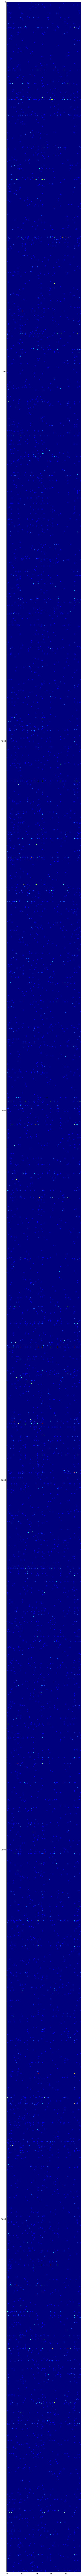

In [156]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pylab as plt

plt.figure(figsize=(35, 250))
plt.imshow(X, interpolation='nearest', vmin=0, vmax=10)
plt.show()




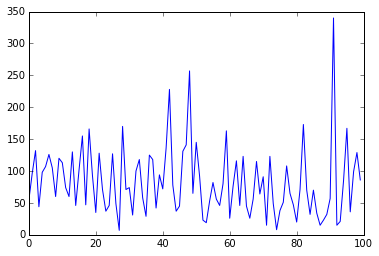

In [163]:
plt.plot((np.sum(X,axis=0)))



In [158]:

U, S, V = np.linalg.svd(X, full_matrices=False)




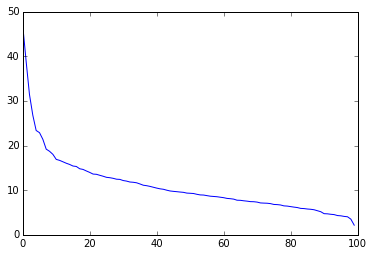

In [159]:
plt.plot(S)

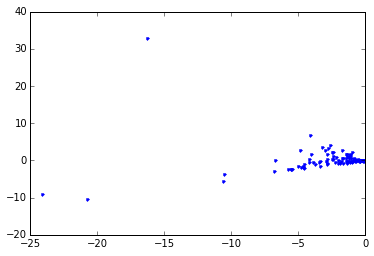

In [161]:
F = np.dot(diag(S), V)

plt.plot(F[0,:], F[1,:], '.')
plt.show()


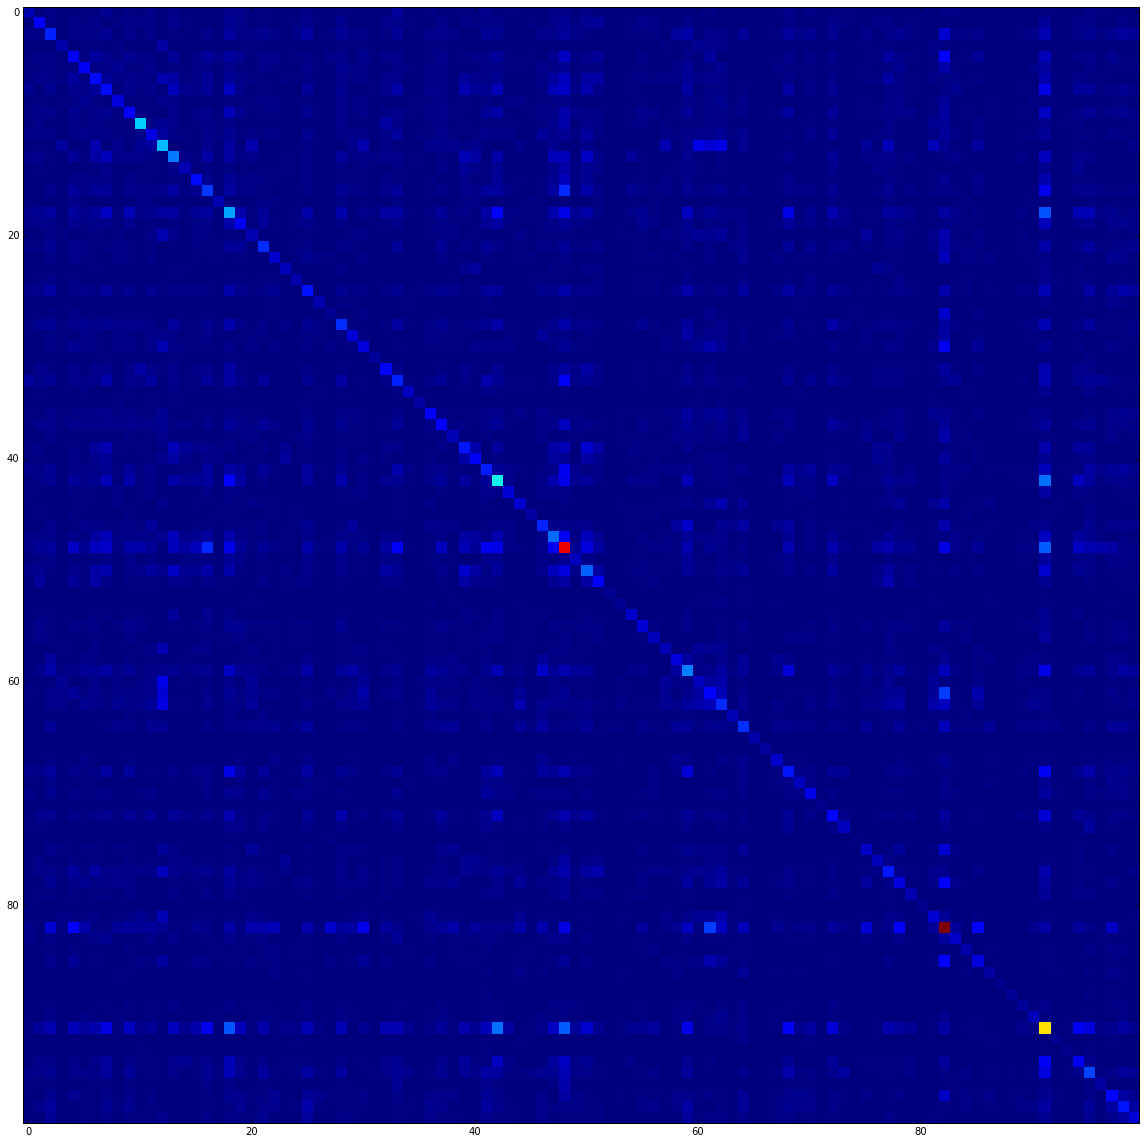

In [166]:
F = np.dot(X.T, X)

plt.figure(figsize=(20, 20))
plt.imshow(F, interpolation='nearest')
